# Credit Score Classifications

## Table of Contents
- <b>[Brief introduction](#1)<b>
- <b>[Importing the necessary packages and libraries](#2)<b>
- <b>[Data Cleaning](#3)<b>
- <b>[Exploratory Data Analysis](#4)<b>
- <b>[Data Preprocessing](#5)<b>
- <b>[Model Implementation](#6)<b>
- <b>[Performance Comparison and Conclusion](#7)<b>
- <b>[Bibliography](#8)<b>

## Brief introduction

<a class='anchor' id=1> <a/>

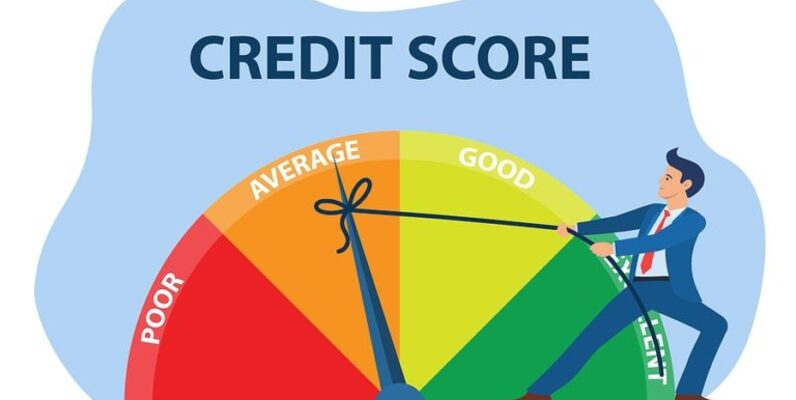

Many financial institutions use credit score classifications to evaluate the creditworthiness of prospective borrowers. A credit score classification assists financial institutions in determining the risk involved in lending money to a borrower. The higher the credit score, the lower the risk, and the more likely it is that the borrower will be approved for a loan or credit line with more favorable terms, such as lower interest rates or higher credit limits.

A lower credit score, on the other hand, suggests a higher risk and may result in the financial institution requiring the borrower to pay a higher interest rate or not approving the loan at all. As a result, credit score classification is important for both the borrower and the lender since it helps with making informed decisions about lending and borrowing money. For example, it is used to determine the interest rates and terms of loans, credit cards, and other financial products.

## Importing the necessary packages and libraries
<a class='anchor' id=2> <a/>

In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import Sequential, layers, initializers, losses, optimizers, regularizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense

import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#Importing the dataset
original_df = pd.read_csv("train.csv")

<ipython-input-3-dba634f743a8>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv("train.csv")


A description of the features available in the dataset which will be used to predict credit scores.

| Features | Description |
| --------------- | --------------- |
| ID | ID |
| Customer_ID | Customer Identifier |
| Month | Months in a year (Jan-Dec) |
| Name | Name of the customer |
| Age | Age of the customer |
| SSN | Social Security Number issued by government |
| Occupation | Job of the customer |
| Annual_Income | Annual income of the customer |
| Monthly_Inhand_Salary | Monthly income of the customer |
| Num_Bank_Accounts | Number of bank accounts owned |
| Num_Credit_Card | Number of credit cards owned |
| Interest_Rate | Interest rate at which loan is availed |
| Num_of_Loan | Number of loans owned |
| Type_of_Loan | Loan type availed by the customer |
| Delay_from_due_date | Number of days late from due date |
| Num_of_Delayed_Payment | Delayed payments |
| Changed_Credit_Limit | Adjustment made to the original credit limit |
| Num_Credit_Inquiries | Number of times customer's credit history has been accessed by lender  |
| Credit_Mix | Evaluating different types of credit accounts that customer has |
| Outstanding_Debt | Amount to be repaid |
| Credit_Utilization_Ratio | Credit used compared to available credit |
| Credit_History_Age | Duration of credit |
| Payment_of_Min_Amount | Whether minimum amount towards their outstanding balance has been paid |
| Total_EMI_per_month | EMI for the months |
| Amount_invested_monthly | Monthly investment |
| Payment_Behaviour | History of how customer has made payments on their debts in the past |
| Monthly_Balance | Monthly_Balance |
| Credit_Score | Score on scale of good, standard and poor |   


## Data Cleaning
<a class='anchor' id='3'> <a/>

In [ ]:
#displaying the original dataset
original_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


For credit score classification, factors such as ID, Customer ID, Name, SSN etc. do not give much information to how credit score is assigned. Moreover these factors needs to be removed as they violate personal indentifiable information regulations as well.

In [ ]:
#Drop columns ID, Customer_ID, Month, Name and SSN
original_df = original_df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1)

In [ ]:
#Displaying feature data types
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

Checking for duplicate values

In [ ]:
#checking for duplicates
original_df.duplicated().sum()

0

In [ ]:
#count the number of missing values for each column
original_df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

There are missing values in few columns (as seen above) which needs to be dealt with in order to ensure that the performance of the model is not affected and the model can make better predictions. Thus, KNN imputation is a statistical model which fills missing values based on neighboring values.

In [ ]:
#Creating a KNN imputer object for imputing missing values in the dataframe
imputer = KNNImputer(n_neighbors=5)

### Fixing erraneous and missing values

In [ ]:
#Remove "_" from values in the Age column
original_df["Age"] = original_df["Age"].str.replace("_", "")

#convert the 'Age' column to a numeric type
original_df['Age'] = pd.to_numeric(original_df['Age'], errors='coerce')

#remove values outside the range of 1-100 from the 'Age' column
original_df.loc[(original_df['Age'] < 1) | (original_df['Age'] > 100), 'Age'] = None

#Fitting the imputer on the Age column and transform the data
imputed_age = imputer.fit_transform(original_df["Age"].values.reshape(-1, 1))

#Age column now has imputed values in place of missing values
original_df["Age"] = imputed_age

In [ ]:
#replace the value "_______" in the 'Occupation' column with "Unknown"
original_df['Occupation'] = original_df['Occupation'].replace("_______", "Unknown")

In [ ]:
#remove "_" present in few values in Annual_Income column
original_df["Annual_Income"] = original_df["Annual_Income"].str.replace("_", "")

#convert the 'Annual_Income' column to a numeric type
original_df['Annual_Income'] = pd.to_numeric(original_df['Annual_Income'], errors='coerce')

In [ ]:
#Fill the missing values in the 'Monthly_Inhand_Salary' column with the imputer
#Fitting the imputer on the Monthly_Inhand_Salary column and transform the data
imputed_salary = imputer.fit_transform(original_df["Monthly_Inhand_Salary"].values.reshape(-1, 1))

#Monthly_Inhand_Salary column now has imputed values in place of missing values
original_df["Monthly_Inhand_Salary"] = imputed_salary

In [ ]:
#remove values outside the range of 0-100 from the 'Num_Bank_Accounts' column
original_df.loc[(original_df['Num_Bank_Accounts'] < 0) | (original_df['Num_Bank_Accounts'] > 100), 'Num_Bank_Accounts'] = None

#Fitting the imputer on the 'Num_Bank_Accounts' column and transform the data
imputed_accounts = imputer.fit_transform(original_df["Num_Bank_Accounts"].values.reshape(-1, 1))

#'Num_Bank_Accounts' column now has imputed values in place of missing values
original_df["Num_Bank_Accounts"] = imputed_accounts

In [ ]:
#remove values outside the range of 0-50 from the 'Num_Credit_Card' column
original_df.loc[(original_df['Num_Credit_Card'] < 0) | (original_df['Num_Credit_Card'] > 50), 'Num_Credit_Card'] = None

#Fitting the imputer on the 'Num_Credit_Card' column and transform the data
imputed_cards = imputer.fit_transform(original_df["Num_Credit_Card"].values.reshape(-1, 1))

#'Num_Credit_Card' column now has imputed values in place of missing values
original_df["Num_Credit_Card"] = imputed_cards

In [ ]:
#remove values outside the range of 0-50 from the 'Interest_Rate' column
original_df.loc[(original_df['Interest_Rate'] < 0) | (original_df['Interest_Rate'] > 50), 'Interest_Rate'] = None

#Fitting the imputer on the 'Num_Credit_Card' column and transform the data
imputed_interest = imputer.fit_transform(original_df["Interest_Rate"].values.reshape(-1, 1))

#'Interest_Rate' column now has imputed values in place of missing values
original_df["Interest_Rate"] = imputed_interest

In [ ]:
#remove "_" present in few values in Num_of_Loan column
original_df["Num_of_Loan"] = original_df["Num_of_Loan"].str.replace("_", "")

#convert the 'Num_of_Loan' column to a numeric type
original_df['Num_of_Loan'] = pd.to_numeric(original_df['Num_of_Loan'], errors='coerce')

#Replace -100 with the imputed loans
original_df.loc[(original_df['Num_of_Loan'] < 0), 'Num_of_Loan'] = None
imputed_loan = imputer.fit_transform(original_df["Num_of_Loan"].values.reshape(-1, 1))
original_df["Num_of_Loan"] = imputed_loan

In [ ]:
#replace the blank values in the 'Type_of_Loan' column with "Unknown"
original_df['Type_of_Loan'] = original_df['Type_of_Loan'].fillna('Unknown')

original_df.Type_of_Loan = original_df.Type_of_Loan.str.replace("and", "").str.replace(" ", "")

In [ ]:
#remove "_" present in few values in Num_of_Delayed_Payment column
original_df["Num_of_Delayed_Payment"] = original_df["Num_of_Delayed_Payment"].str.replace("_", "")

#convert the 'Num_of_Delayed_Payment' column to a numeric type
original_df['Num_of_Delayed_Payment'] = pd.to_numeric(original_df['Num_of_Delayed_Payment'], errors='coerce')

#'Num_of_Delayed_Payment' column now has imputed values in place of missing values
imputed_payments = imputer.fit_transform(original_df["Num_of_Delayed_Payment"].values.reshape(-1, 1))
original_df["Num_of_Delayed_Payment"] = imputed_payments

In [ ]:
#replace "_" with 0 present in few values in Changed_Credit_Limit column
original_df["Changed_Credit_Limit"] = original_df["Changed_Credit_Limit"].replace("_", 0)

#convert column Changed_Credit_Limit from object to float
original_df['Changed_Credit_Limit'] = original_df['Changed_Credit_Limit'].astype(float)

In [ ]:
#'Num_Credit_Inquiries' column now has imputed values in place of missing values
imputed_inquiries = imputer.fit_transform(original_df["Num_Credit_Inquiries"].values.reshape(-1, 1))
original_df["Num_Credit_Inquiries"] = imputed_inquiries

In [ ]:
#replace the "_" in the 'Credit_Mix' column with "Unknown"
original_df['Credit_Mix'] = original_df['Credit_Mix'].str.replace("_", "Unknown")

In [ ]:
#remove "_" present in few values in Outstanding_Debt column
original_df["Outstanding_Debt"] = original_df["Outstanding_Debt"].str.replace("_", "")

#convert the 'Outstanding_Debt' column to a numeric type
original_df['Outstanding_Debt'] = pd.to_numeric(original_df['Outstanding_Debt'], errors='coerce')

In [ ]:
#remove "_" present in few values in Amount_invested_monthly column
original_df["Amount_invested_monthly"] = original_df["Amount_invested_monthly"].str.replace("_", "")

#convert the 'Amount_invested_monthly' column to a float type
original_df['Amount_invested_monthly'] = original_df['Amount_invested_monthly'].astype(float)

#'Amount_invested_monthly' column now has imputed values in place of missing values
imputed_investment = imputer.fit_transform(original_df["Amount_invested_monthly"].values.reshape(-1, 1))
original_df["Amount_invested_monthly"] = imputed_investment

In [ ]:
#replace erraneous value "_" present in few values in Payment_Behaviour column with "Unknown"
original_df["Payment_Behaviour"] = original_df["Payment_Behaviour"].str.replace("!@9#%8", "Unknown")

In [ ]:
#remove "_" present in few values in Monthly_Balance column
original_df["Monthly_Balance"] = original_df["Monthly_Balance"].str.replace("_", "")

#convert the 'Monthly_Balance' column to a float type
original_df['Monthly_Balance'] = original_df['Monthly_Balance'].astype(float)

#Replace -333333333333333333333333333 with the imputed balance
original_df.loc[(original_df['Monthly_Balance'] < 0), 'Monthly_Balance'] = None
imputed_balance = imputer.fit_transform(original_df["Monthly_Balance"].values.reshape(-1, 1))
original_df["Monthly_Balance"] = imputed_balance

## Exploratory Data Analysis

The purpose of this section is to summarize the main characteristics of the dataset. By doing so, we can gain a better understanding of the data and also identify potential relationships between variables that can be investigated further using statistical modeling.

#### Exploring relationship between top 10 occupations and number of credit card holders

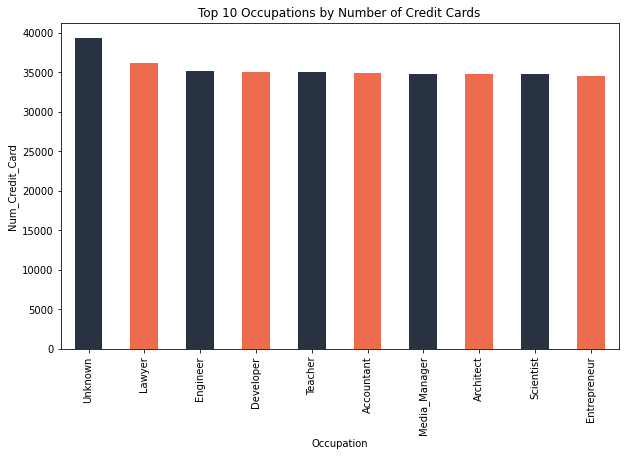

In [ ]:
top_occupations = original_df.groupby('Occupation')['Num_Credit_Card'].sum().sort_values(ascending=False).head(10)
colors = ["#293241", "#ee6c4d"]
top_occupations.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Top 10 Occupations by Number of Credit Cards')
plt.xlabel('Occupation')
plt.ylabel('Num_Credit_Card')
plt.show()

From the above chart, the value 'Unknown' can be disregarded as it accounts for customers jobs unknown. But we can infer that Lawyers account for majority of credit card holders.

### Analysis between age of customers and number of loans availed

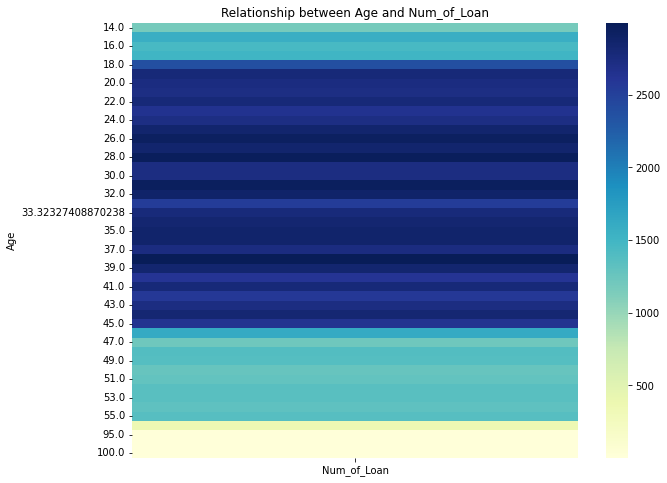

In [ ]:
plt.figure(figsize=(10, 8))
# create a pivot table with age as index, Num_of_Loan as columns, and Type_of_Loan as values
pivot_table = pd.pivot_table(original_df, values='Num_of_Loan', index=['Age'], aggfunc=len)
sns.heatmap(pivot_table, cmap='YlGnBu')

plt.title('Relationship between Age and Num_of_Loan')
plt.show()


From the above visualisation, we can observe that most of the loans are availed by the age group 18-45. And there could be several reasons why the age group 18-45 is availing most of the loans:

- This age group is more likely to have a steady source of income as compared to younger age groups, which makes them eligible for loans.
- This age group may have more financial responsibilities such as education, housing, and raising a family, which require additional funding.
- Banks and lending institutions may be more willing to lend to this age group as they are considered to be in their prime earning years and have a longer repayment period.
- This age group may be more aware of the benefits of taking loans and have more access to credit facilities.

### Correlation Matrix to determine strongest relationship between variables

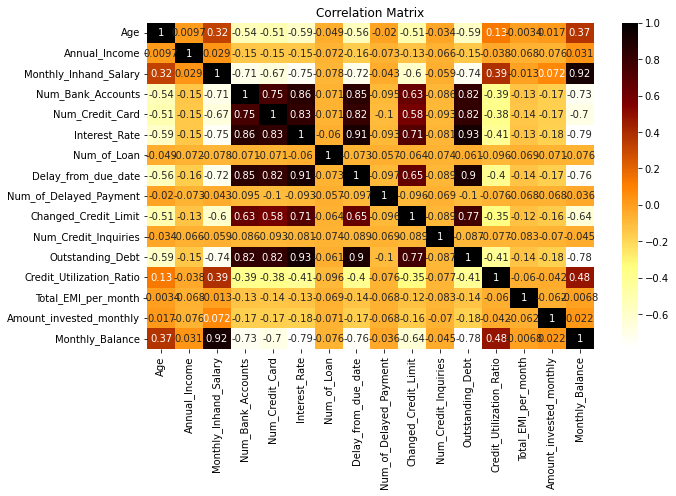

In [ ]:
# Calculate the correlation matrix
corr_matrix = original_df.corr().corr()

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='afmhot_r')
plt.title('Correlation Matrix')
plt.show()

Some meaningful inferences from above visualisation:
- There is a very strong positive linear relationship between the two variables Outstanding debt and Interest rate. This means that as outstanding debt increases, so does the interest rate, and vice versa.
- There might be a tendency for customers with a higher number of bank accounts to have a higher change in their credit limit.
- As the monthly inland salary increases, the credit utilization ratio tends to increase as well, but the relationship is not strong.
- As the annual income increases, the delay from the loan due date decreases, and vice versa.

### Investigating monthly salary and credit score

<Axes: xlabel='Payment_of_Min_Amount', ylabel='Monthly_Inhand_Salary'>

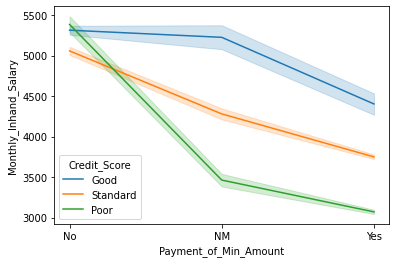

In [ ]:
sns.lineplot(
    data=original_df, x="Payment_of_Min_Amount", y="Monthly_Inhand_Salary", hue="Credit_Score"
)


From the plot, we can observe that customers with a higher credit score tend to have a higher monthly in-hand salary and also tend to pay a larger percentage of the minimum payment amount.

<Axes: xlabel='Credit_Mix', ylabel='Monthly_Inhand_Salary'>

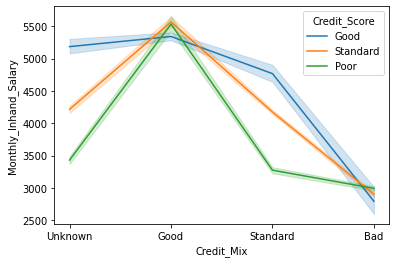

In [ ]:
sns.lineplot(
    data=original_df, x="Credit_Mix", y="Monthly_Inhand_Salary", hue="Credit_Score"
)

The line plot above shows how Credit Mix and Monthly Inhand Salary relate to Credit Score. Credit Mix is a factor that determines the type of credit that a person has (e.g. credit cards, car loans, student loans, etc.). Monthly Inhand Salary is the amount of money a person receives each month after taxes and other deductions. The plot shows that people who have a diverse range of credit types (e.g. credit cards, car loans, student loans, etc.) are more likely to have a higher credit score than those who have only one type of credit.

<Axes: xlabel='Num_of_Loan', ylabel='Monthly_Inhand_Salary'>

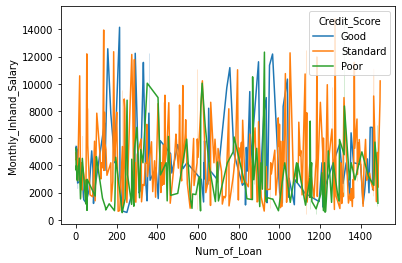

In [ ]:
sns.lineplot(
    data=original_df, x="Num_of_Loan", y="Monthly_Inhand_Salary", hue="Credit_Score"
)

The graph shows the trend of how monthly in-hand salary changes with the increase in the number of loans a person has, with different colored lines representing different credit scores. We can use this plot to understand how a person's monthly in-hand salary varies depending on their credit score and the number of loans they have. For more number of loans availed, the credit score becomes standard as monthly inhand salary is also standard. For a good credit score, number of loans should be lesser than 1000 and also inhand salary should be relatively higher.

### Analysis on Credit Score

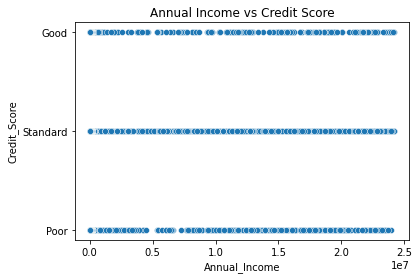

In [ ]:
sns.scatterplot(data=original_df, x="Annual_Income", y="Credit_Score")
plt.title('Annual Income vs Credit Score')
plt.show()

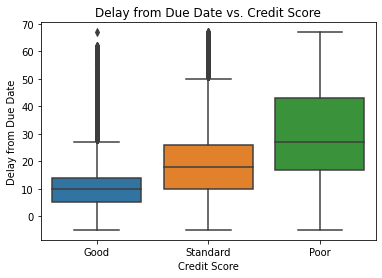

In [ ]:
sns.boxplot(x="Credit_Score", y="Delay_from_due_date", data=original_df)
plt.title("Delay from Due Date vs. Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Delay from Due Date")
plt.show()

As the payment after due date is delayed, it can have a negative effect on the credit score and hence depleting it. A standard credit score can be achieved by not extending the payment date by too long (after the due date)

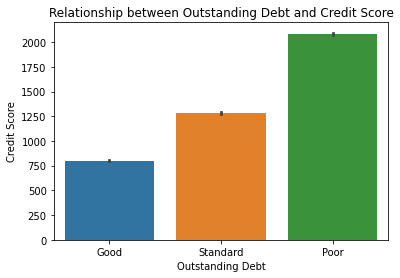

In [ ]:
sns.barplot(data=original_df, y="Outstanding_Debt", x="Credit_Score")
plt.title("Relationship between Outstanding Debt and Credit Score")
plt.xlabel("Outstanding Debt")
plt.ylabel("Credit Score")
plt.show()

The y-axis represents the different levels of outstanding debt and the x-axis represents the credit score. The height of each bar represents the average credit score for that level of outstanding debt. It is observed that a poor credit score can be caused by a high outstanding debt and vice versa.

## Data Preprocessing

In this section, data preprocessing will be applied to the dataset to transform raw data into a format that can be easily analyzed by the predictive model. By doing so, we can ensure that the data is accurate, complete, and in a format that is suitable for analysis.

### One-hot encoding for categorical features

One hot encoding is performed here convert categorical features into a binary format that can be used for the models. The reason for doing so is simply because the model can treat each category as a separate feature with a binary value, rather than assuming that one category is greater than another.

In [ ]:
#One hot encoding to convert the categorical features in to binary format
dummy_cat = original_df[['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']]
dummy_var = pd.get_dummies(dummy_cat)
original_df = original_df.drop(['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour'], axis=1)
original_df = pd.concat([original_df, dummy_var], axis=1)

In [ ]:
#Encoding target variable 'Credit_Score'
original_df["Credit_Score"], _ = pd.factorize(original_df["Credit_Score"])

In the following cell, we define the features and target variable (credit score). The target variable will be the predicted outcome. We also apply standard scaler to all numerical features to ensure they are on the same range and data skewness is removed.

In [ ]:
#defining features and target
X = original_df.drop(columns=["Credit_History_Age", "Credit_Score"], axis=1)
y = original_df['Credit_Score']

#standardizing features to ensure all values are on the same range
scl = StandardScaler()
X = scl.fit_transform(X)

In [ ]:
#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state= 42)

In [ ]:
#convert the target variable to a numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
y_train[y_train == -1] = np.random.randint(0, 3, size=(len(y_train[y_train == -1]),))
y_test[y_test == -1] = np.random.randint(0, 3, size=(len(y_test[y_test == -1]),))

## Model Implementation

### Multi-layer feedforward neural network - (Base) Model I

Based on neural network model work by https://www.kaggle.com/code/clausnesrbesolbakken/credit-score-classification-with-neural-network, few parameters have been changed to check if the model performance increases/decreases.

In the below code, following changes were made:

- Changed the weight initializer to GlorotNormal, which is a widely used initializer that is known to work well with ReLU activations.
- Limit the search space in function predictive_model() to layers of 1 or 2
- Increased the range of units for each layer, with a step of 128, which allows for a wider range of model sizes.
- Added a Dropout layer after each dense layer, with a tunable dropout rate (range 0.0-0.5, step 0.1, default 0.2). This can help prevent overfitting.
- Increased the max_epochs to 20, to allow for more training time.
- Added a learning rate of 1e-4 to the possible choices for the Adam optimizer. This lower learning rate may be more suitable for smaller datasets.

In [ ]:
initializer = initializers.GlorotNormal(seed=42)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

def predictive_model(hp):
    model1 = Sequential()
    model1.add(layers.Flatten())
    for i in range(hp.Int('num_layers', 1, 2)):
        model1.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=128, max_value=512, step=128), activation='relu',
                                            kernel_initializer=initializer))
        model1.add(layers.Dropout(hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1, default=0.2)))
    model1.add(layers.Dense(3, activation='softmax'))

    model1.compile(
      optimizer=optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
      loss=losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy'])

    return model1

tuner = kt.Hyperband(
    predictive_model,
    objective="val_accuracy",
    max_epochs=20
)
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[stop_early])

Trial 30 Complete [00h 00m 53s]
val_accuracy: 0.7176399827003479

Best val_accuracy So Far: 0.7465599775314331
Total elapsed time: 00h 23m 45s


In [ ]:
model1_eval = tuner.get_best_models()[0]
y_pred_prob = model1_eval.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
tf_result = tf.math.confusion_matrix(y_test, y_pred)

print(tf_result)
print(classification_report(y_test, y_pred))

1563/1563 [==============================] - 3s 2ms/step
tf.Tensor(
[[ 5305  3522   136]
 [ 2384 20769  3423]
 [  497  2710 11254]], shape=(3, 3), dtype=int32)
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      8963
           1       0.77      0.78      0.78     26576
           2       0.76      0.78      0.77     14461

    accuracy                           0.75     50000
   macro avg       0.73      0.72      0.72     50000
weighted avg       0.74      0.75      0.75     50000



### Multi-layer feedforward neural network - Model II with regularization and adjusting the learning rate along with change in optimizer

In [ ]:
def mod_predictive_model(sp):
    model2 = Sequential()
    model2.add(layers.Flatten())
    for i in range(sp.Int('num_layers', 1, 2)):
        model2.add(layers.Dense(units=sp.Int('units_' + str(i),
                                            min_value=128, max_value=512, step=128), activation='relu',
                                            kernel_initializer=initializer,
                               kernel_regularizer=regularizers.l2(sp.Choice('reg_rate', values=[1e-2, 1e-3, 1e-4]))))
        model2.add(layers.Dropout(sp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1, default=0.2)))
    model2.add(layers.Dense(3, activation='softmax'))

    optimizer = sp.Choice('optimizer', ['adam', 'sgd'])
    learning_rate = sp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

    if optimizer == 'adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = optimizers.SGD(learning_rate=learning_rate)

    model2.compile(
      optimizer=optimizer,
      loss=losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy'])

    return model2

updated_tuner = kt.Hyperband(
    mod_predictive_model,
    objective="val_accuracy",
    max_epochs=20
)
updated_tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[stop_early])


In [ ]:
updated_model = updated_tuner.get_best_models()[0]
y_pred_prob2 = updated_model.predict(X_test)
y_pred2 = np.argmax(y_pred_prob2, axis=1)
tf_result = tf.math.confusion_matrix(y_test, y_pred2)

print(tf_result)
print(classification_report(y_test, y_pred2))

1563/1563 [==============================] - 2s 1ms/step
tf.Tensor(
[[ 5305  3522   136]
 [ 2384 20769  3423]
 [  497  2710 11254]], shape=(3, 3), dtype=int32)
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      8963
           1       0.77      0.78      0.78     26576
           2       0.76      0.78      0.77     14461

    accuracy                           0.75     50000
   macro avg       0.73      0.72      0.72     50000
weighted avg       0.74      0.75      0.75     50000



### Sequential Neural Network with no fine tuning**

In this model, we face the issue of class imbalance, hence class weights have been assigned based on inverse frequency of each class e.g. (len(y_train)/len(class 0))

In [ ]:
#set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#balance class weights
class_weights = {0: 5.3, 1: 1.9, 2: 3.4}

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # a smaller value allows for finer tuning of the model
    patience=25, # epochs the model will continue to train before early stopping
    restore_best_weights=True,
)

#initializing the model
model3 = tf.keras.Sequential()

#adding layers to the model
model3.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu', input_dim=X_train.shape[1]))
model3.add(layers.Dropout(0.5))
model3.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu'))
model3.add(layers.Dropout(0.4))
model3.add(Dense(units=16, kernel_initializer='glorot_uniform', activation='relu'))
model3.add(layers.Dropout(0.3))
model3.add(Dense(units=8, kernel_initializer='glorot_uniform', activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(Dense(units=3, kernel_initializer='glorot_uniform', activation='softmax'))

optimizer = optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#training the model
fit3 = model3.fit(X_train, y_train, batch_size=32, epochs=200, callbacks=[early_stopping], validation_data=(X_test, y_test), class_weight=class_weights)

Epoch 1/200
1563/1563 [==============================] - 13s 7ms/step - loss: 3.1235 - accuracy: 0.4411 - val_loss: 0.9171 - val_accuracy: 0.5772
Epoch 2/200
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5953 - accuracy: 0.5691 - val_loss: 0.8294 - val_accuracy: 0.6417
Epoch 3/200
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3258 - accuracy: 0.6319 - val_loss: 0.7812 - val_accuracy: 0.6788
Epoch 4/200
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1705 - accuracy: 0.6703 - val_loss: 0.7708 - val_accuracy: 0.6984
Epoch 5/200
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0681 - accuracy: 0.6958 - val_loss: 0.7476 - val_accuracy: 0.6951
Epoch 6/200
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0166 - accuracy: 0.7077 - val_loss: 0.7584 - val_accuracy: 0.7002
Epoch 7/200
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9751 - accuracy: 0.7149 - val_loss: 0.7487 - val_a

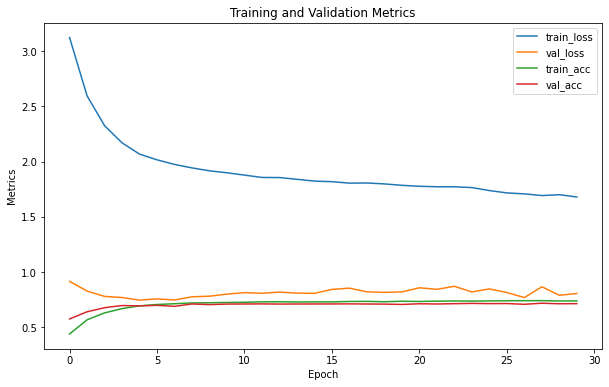

In [ ]:
# plot the training and validation loss and accuracy
plt.figure(figsize=(10, 6))
plt.plot(fit3.history['loss'], label='train_loss')
plt.plot(fit3.history['val_loss'], label='val_loss')
plt.plot(fit3.history['accuracy'], label='train_acc')
plt.plot(fit3.history['val_accuracy'], label='val_acc')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [ ]:
# evaluate the model on the test data
test_loss, test_acc = model3.evaluate(X_test, y_test)

# print the test accuracy
print('Test accuracy:', test_acc)

# predict the labels for the test data
y_pred_prob = model3.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
tf_result = tf.math.confusion_matrix(y_test, y_pred)
print(tf_result)
print(classification_report(y_test, y_pred, zero_division=1))

1563/1563 [==============================] - 4s 2ms/step - loss: 0.7476 - accuracy: 0.6951
Test accuracy: 0.6950799822807312
1563/1563 [==============================] - 3s 2ms/step
tf.Tensor(
[[ 7573  1387     3]
 [ 5653 18850  2073]
 [ 1543  4587  8331]], shape=(3, 3), dtype=int32)
              precision    recall  f1-score   support

           0       0.51      0.84      0.64      8963
           1       0.76      0.71      0.73     26576
           2       0.80      0.58      0.67     14461

    accuracy                           0.70     50000
   macro avg       0.69      0.71      0.68     50000
weighted avg       0.73      0.70      0.70     50000



### Sequential Neural Network with fine tuning

In this model, the previous model using sequential neural network is updated with Batch Normalization and added layers to fine tune the model.

In [ ]:
from tensorflow.keras.layers import BatchNormalization

np.random.seed(42)
tf.random.set_seed(42)

#initialize the model
model4 = tf.keras.Sequential()

#add layers to the model
model4.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu', input_dim=X_train.shape[1]))
model4.add(BatchNormalization())
model4.add(layers.Dropout(0.5))

model4.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))
model4.add(BatchNormalization())
model4.add(layers.Dropout(0.4))

model4.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
model4.add(BatchNormalization())
model4.add(layers.Dropout(0.3))

model4.add(Dense(units=16, kernel_initializer='he_uniform', activation='relu'))
model4.add(BatchNormalization())
model4.add(layers.Dropout(0.2))

model4.add(Dense(units=8, kernel_initializer='he_uniform', activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(units=3, activation='softmax'))

#compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train the model
fit4 = model4.fit(X_train, y_train, batch_size=32, epochs=200, callbacks=[early_stopping], validation_data=(X_test, y_test), class_weight=class_weights)


Epoch 1/200
1563/1563 [==============================] - 20s 11ms/step - loss: 3.1543 - accuracy: 0.4352 - val_loss: 0.8967 - val_accuracy: 0.5731
Epoch 2/200
1563/1563 [==============================] - 14s 9ms/step - loss: 2.5095 - accuracy: 0.5727 - val_loss: 0.7789 - val_accuracy: 0.6649
Epoch 3/200
1563/1563 [==============================] - 14s 9ms/step - loss: 2.2161 - accuracy: 0.6522 - val_loss: 0.7220 - val_accuracy: 0.7020
Epoch 4/200
1563/1563 [==============================] - 13s 9ms/step - loss: 2.0584 - accuracy: 0.6892 - val_loss: 0.7012 - val_accuracy: 0.7079
Epoch 5/200
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9803 - accuracy: 0.7034 - val_loss: 0.6885 - val_accuracy: 0.7137
Epoch 6/200
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9195 - accuracy: 0.7124 - val_loss: 0.6926 - val_accuracy: 0.7140
Epoch 7/200
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8727 - accuracy: 0.7193 - val_loss: 0.6720 

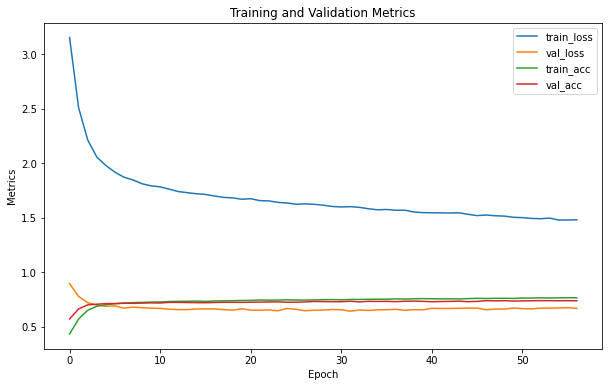

In [ ]:
#plot the training and validation loss and accuracy
plt.figure(figsize=(10, 6))
plt.plot(fit4.history['loss'], label='train_loss')
plt.plot(fit4.history['val_loss'], label='val_loss')
plt.plot(fit4.history['accuracy'], label='train_acc')
plt.plot(fit4.history['val_accuracy'], label='val_acc')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [ ]:
# evaluate the model on the test data
test_loss, test_acc = model4.evaluate(X_test, y_test)

# print the test accuracy
print('Test accuracy:', test_acc)

# predict the labels for the test data
y_pred_prob = model4.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
tf_result = tf.math.confusion_matrix(y_test, y_pred)
print(tf_result)
print(classification_report(y_test, y_pred, zero_division=1))

1563/1563 [==============================] - 4s 3ms/step - loss: 0.6441 - accuracy: 0.7355
Test accuracy: 0.7354999780654907
1563/1563 [==============================] - 3s 2ms/step
tf.Tensor(
[[ 7484  1354   125]
 [ 5044 17682  3850]
 [ 1249  1603 11609]], shape=(3, 3), dtype=int32)
              precision    recall  f1-score   support

           0       0.54      0.83      0.66      8963
           1       0.86      0.67      0.75     26576
           2       0.74      0.80      0.77     14461

    accuracy                           0.74     50000
   macro avg       0.71      0.77      0.73     50000
weighted avg       0.77      0.74      0.74     50000



## Performance Comparison and Conclusion

To compare the performance of the given models, we can compare their accuracy, precision, recall, and F1-score on the test set.

Comparison of the performance of the four models:


| Model         | Accuracy | Precision | Recall | F1-score |
|---------------|----------|-----------|--------|----------|
| Model1/Model2 | 0.75     | 0.73      | 0.72   | 0.72     |
| Model3        | 0.70     | 0.73      | 0.70   | 0.70     |
| Model4        | 0.74     | 0.77      | 0.74   | 0.74     |

The four models seem to have similar overall performance, as their accuracy scores are all around 0.70-0.75. However, when looking at the precision, recall, and f1-score values for each class, some differences can be observed.

Model 1 and Model 2 have exactly the same performance, as their confusion matrices and classification reports are identical. These models have good accuracy scores of 0.75 and perform relatively well across all three classes. They have precision, recall, and f1-score values ranging from 0.70 to 0.77, indicating that they can correctly identify the different classes with relatively high accuracy.

Model 3 has a slightly lower accuracy score of 0.70, but it still performs relatively well. However, it appears to struggle more with classifying the first class, as its precision, recall, and f1-score values for this class are noticeably lower than for the other two classes. This means that it is less accurate in correctly identifying the first class compared to the other two classes.

Model 4 also has an accuracy score of 0.74 and performs similarly to Model 3 in terms of precision, recall, and f1-score values for the first and third classes. However, it has a higher precision, recall, and f1-score for the second class, indicating that it is more accurate in identifying this class compared to the other models.

A clear conclusion about which type of neural network is better cannot be made based solely on these results. However, it is worth noting that the Sequential Neural Network models (3 and 4) had slightly lower accuracy scores but performed better in terms of recall for class 0 and 2. This suggests that the Sequential Neural Network may be better suited for this specific task, as it appears to be better at identifying certain classes.

## Bibliography

- www.kaggle.com. (n.d.). Credit score classification. [online] Available at: https://www.kaggle.com/datasets/parisrohan/credit-score-classification.
- kaggle.com. (n.d.). Rain Prediction: ANN. [online] Available at: https://www.kaggle.com/code/karnikakapoor/rain-prediction-ann#MODEL-BUILDING.
-kaggle.com. (n.d.). Credit Score classification with neural network. [online] Available at: https://www.kaggle.com/code/clausnesrbesolbakken/credit-score-classification-with-neural-network.
- kaggle.com. (n.d.). Credit Score EDA + Prediction (Multi-Class). [online] Available at: https://www.kaggle.com/code/mohamedahmed10000/credit-score-eda-prediction-multi-class#Data-Preprocessing.
- kaggle.com. (n.d.). Credit Score Classification Cleaning,EDA,Modling. [online] Available at: https://www.kaggle.com/code/mohamedramadanyakoub/credit-score-classification-cleaning-eda-modling.
- Dobilas, S. (2022). Feed Forward Neural Networks — How To Successfully Build Them in Python. [online] Medium. Available at: https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a.
- Singh, A. (2021). Hyperparameter Tuning Of Neural Networks using Keras Tuner. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/08/hyperparameter-tuning-of-neural-networks-using-keras-tuner/.
- Brownlee, J. (2018). How to Configure the Number of Layers and Nodes in a Neural Network. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/.